In [297]:
#importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score,mean_squared_error

## Data Loading and Data Inspection

In [298]:
#importing data

data = pd.read_csv("train.csv")

In [299]:
data.shape

(1460, 81)

In [300]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [301]:
#only 38 of 81 columns are numeric.

In [302]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Deleting columns which have only one unique value

In [303]:
for col in data.columns:
    if len(data[col].unique()) == 1:
        data.drop(col,inplace=True,axis=1)

In [304]:
data.shape
#no such columns found

(1460, 81)

## Checking Null Values %

In [305]:
#Getting % of nullrecords per column
data_null = data.isnull().sum()*100/len(data)

In [306]:
#filtering for null columns only
data_null[data_null>0]

LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

In [307]:
data_null[data_null>0].shape

(19,)

In [308]:
#There are 19 columns which have some null data of which 5 columns have more than 45% null data
#We can remove those 5 columns

## Deleting columns with high null value%

In [309]:
null_columns_to_remove = data_null[data_null>45].index.to_list()

In [310]:
null_columns_to_remove

['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

In [311]:
data_clean = data.drop(axis=1,columns = null_columns_to_remove)
data_clean.shape

(1460, 76)

In [312]:
#Lets look at other 14 columns
#1. LotFrontage and MasVnrArea are numeric, we will fill NA with median data of the column
#2. The other 12 columns are categorical. We will create a new category in each of these columns to replace NA/

## Handling NA Values for numerical variables

In [313]:
#imputing with median values for NA fields
data_clean['MasVnrArea'].fillna(data_clean['MasVnrArea'].median(),inplace = True)
data_clean['LotFrontage'].fillna(data_clean['LotFrontage'].median(),inplace = True)

#For imputing null values of GarageYrBuilt lets derive it as the property's Built year + difference in mean ages of garageyrbuilt and yearbuilt from existing data
data_clean['GarageYrBlt'].fillna(data_clean['YearBuilt'] + data_clean['GarageYrBlt'].mean()-data_clean['YearBuilt'].mean(),inplace = True)

## Handling NA Values for Categorical variables

In [314]:
#Creating new category where NA is present in data
data_clean['MasVnrType'].fillna(value = "No MasVnrType",inplace = True)
data_clean['BsmtQual'].fillna(value = "No BsmtQual",inplace = True)
data_clean['BsmtCond'].fillna(value = "No BsmtCond",inplace = True)
data_clean['BsmtExposure'].fillna(value = "No BsmtExposure",inplace = True)
data_clean['BsmtFinType1'].fillna(value = "No BsmtFinType1",inplace = True)
data_clean['BsmtFinType2'].fillna(value = "No BsmtFinType2",inplace = True)
data_clean['Electrical'].fillna(value = "No Electrical",inplace = True)
data_clean['GarageType'].fillna(value = "No GarageType",inplace = True)
data_clean['GarageFinish'].fillna(value = "No GarageFinish",inplace = True)
data_clean['GarageQual'].fillna(value = "No GarageQual",inplace = True)
data_clean['GarageCond'].fillna(value = "No GarageCond",inplace = True)

In [315]:
#Lets look at the new shape of the data
data_clean.shape

(1460, 76)

In [316]:
#checking for null records after the above corrections
data_null = data_clean.isnull().sum()*100/len(data_clean)
data_null[data_null>0]

Series([], dtype: float64)

In [317]:
#checking for null records after the above corrections
data_clean.isnull().sum().sum()

0

## Dropping Id Cloumn

In [318]:
data_clean.drop(axis=1,columns = ['Id'],inplace = True)

## Creating Derived Columns

In [319]:
#Creating 2 age of house varuiables - One which is YearSold - YearBuilt and other YearSold - YearRemodAdd.

In [320]:
data_clean['AgeofHouse_FromBuiltYear'] = data_clean['YrSold'] - data_clean['YearBuilt']
data_clean['AgeofHouse_FromRemodYear'] = data_clean['YrSold'] - data_clean['YearRemodAdd']
data_clean['AgeofGarage'] = data_clean['YrSold'] - data_clean['GarageYrBlt']

In [321]:
#deleting YrSold feature as it is not required anymore beacause of above derived features
data_clean.drop(axis=1,columns = ['YrSold','YearBuilt','YearRemodAdd','GarageYrBlt'],inplace = True)

## EDA on Target Variable

<AxesSubplot:xlabel='SalePrice'>

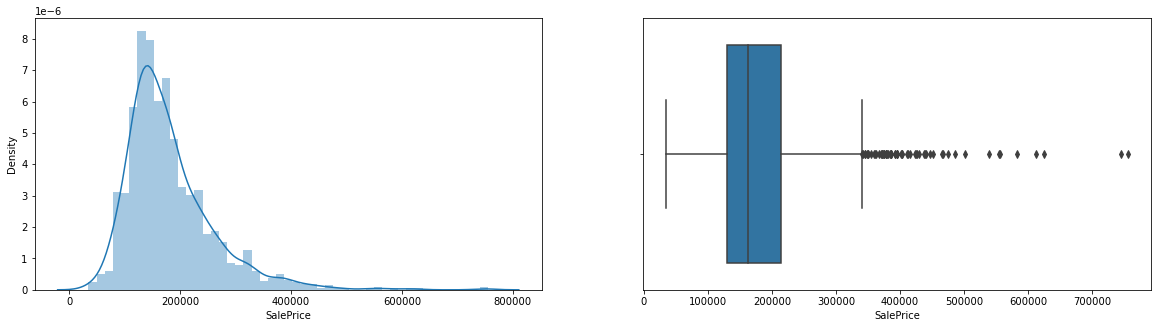

In [322]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.distplot(data_clean['SalePrice'])

plt.subplot(1,2,2)
sns.boxplot(data_clean['SalePrice'])

SalePrice has right skewed distribution and there are certain outliers in the sale price training data

## EDA - Numerical Variables (Univariate Analysis - Box plots)

In [323]:
data_clean.describe().T.shape

(36, 8)

There are 36 numerical variables in the dataset. Let's store them in a variable

In [324]:
num_vars = data_clean.describe().T.index.to_list()

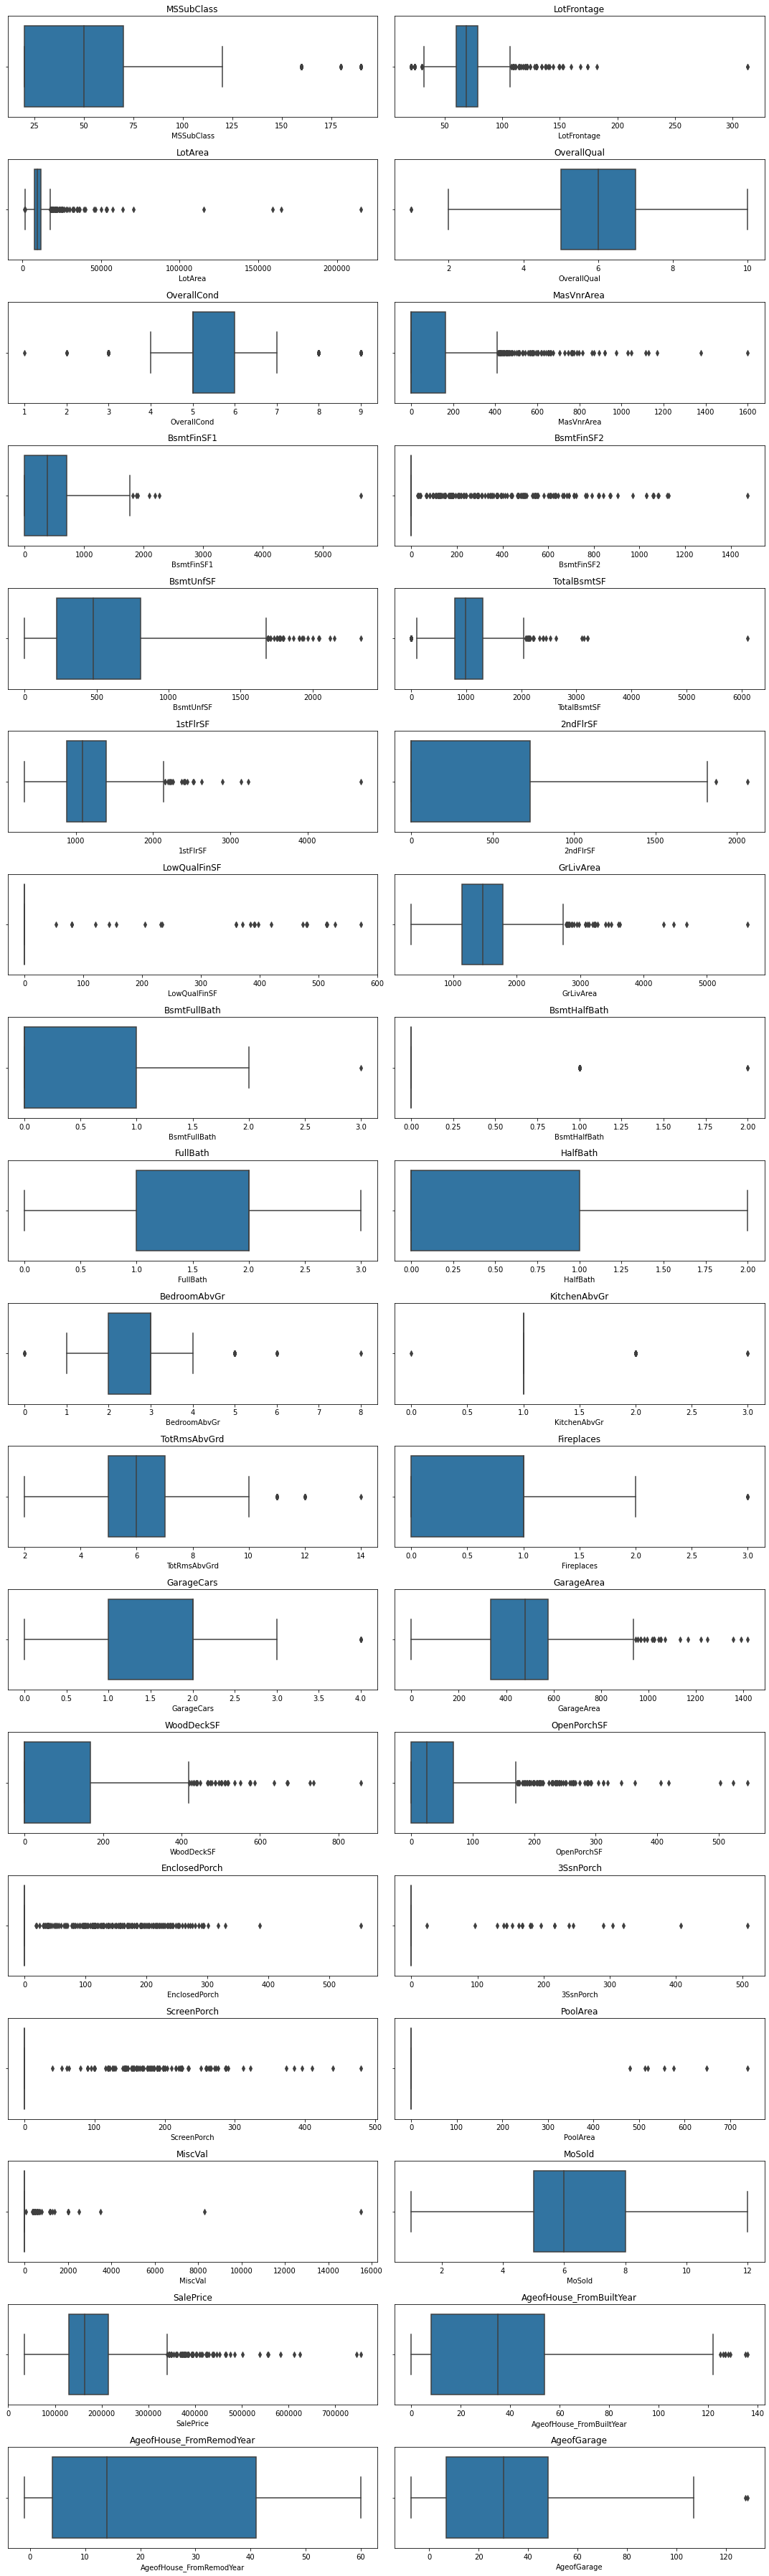

In [325]:
n_row=18
n_col=2
n_pos=1

fig = plt.figure(figsize=(50,40))
fig.set_size_inches(15, 50)

for i in num_vars:
    plt.subplot(n_row,n_col,n_pos)
    sns.boxplot(data_clean[i])
    plt.title(i)
    n_pos = n_pos+1
    plt.tight_layout()

## EDA - Numerical Variables (Bivariate Analysis - Scatter plots)

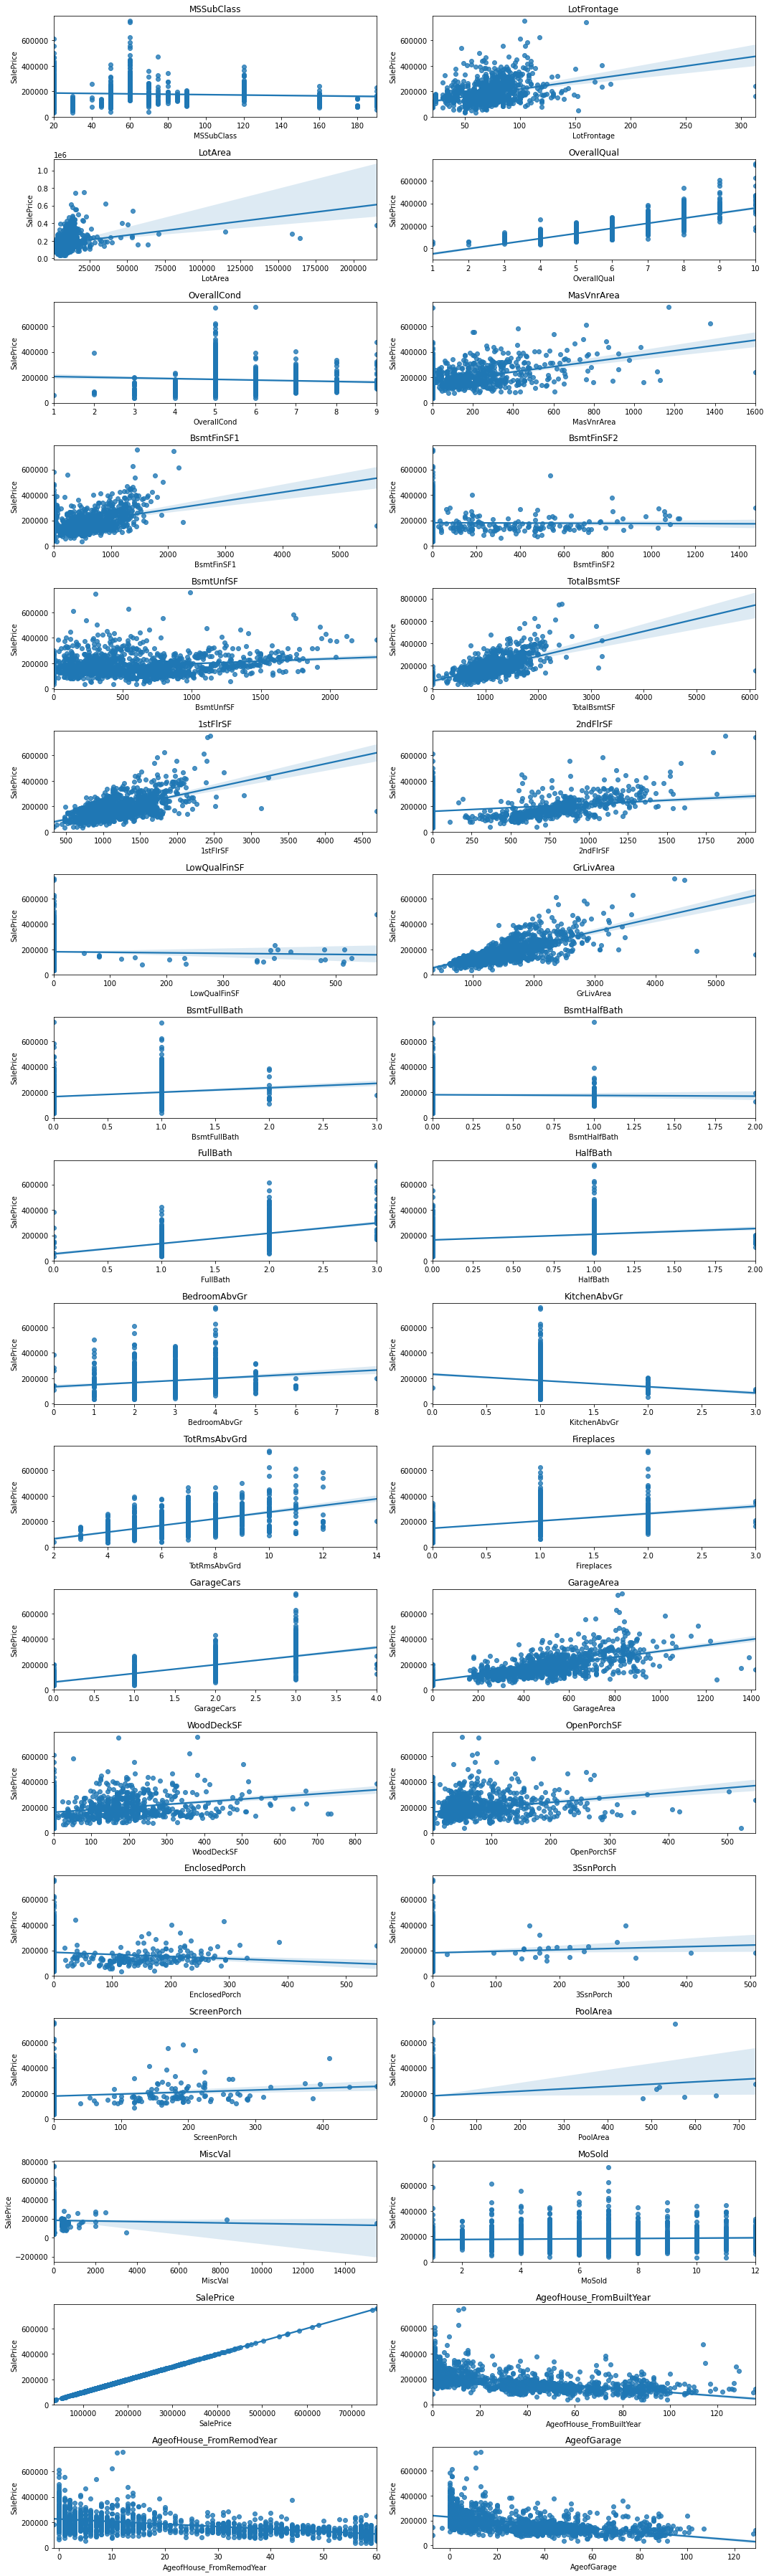

In [326]:
n_row=18
n_col=2
n_pos=1

fig = plt.figure(figsize=(50,40))
fig.set_size_inches(15, 50)

for i in num_vars:
    plt.subplot(n_row,n_col,n_pos)
    sns.regplot(x = data_clean[i], y =data_clean['SalePrice'])
    plt.title(i)
    n_pos = n_pos+1
    plt.tight_layout()

## EDA - Numerical Variables (Multivariate Analysis - HeatMap)

<AxesSubplot:>

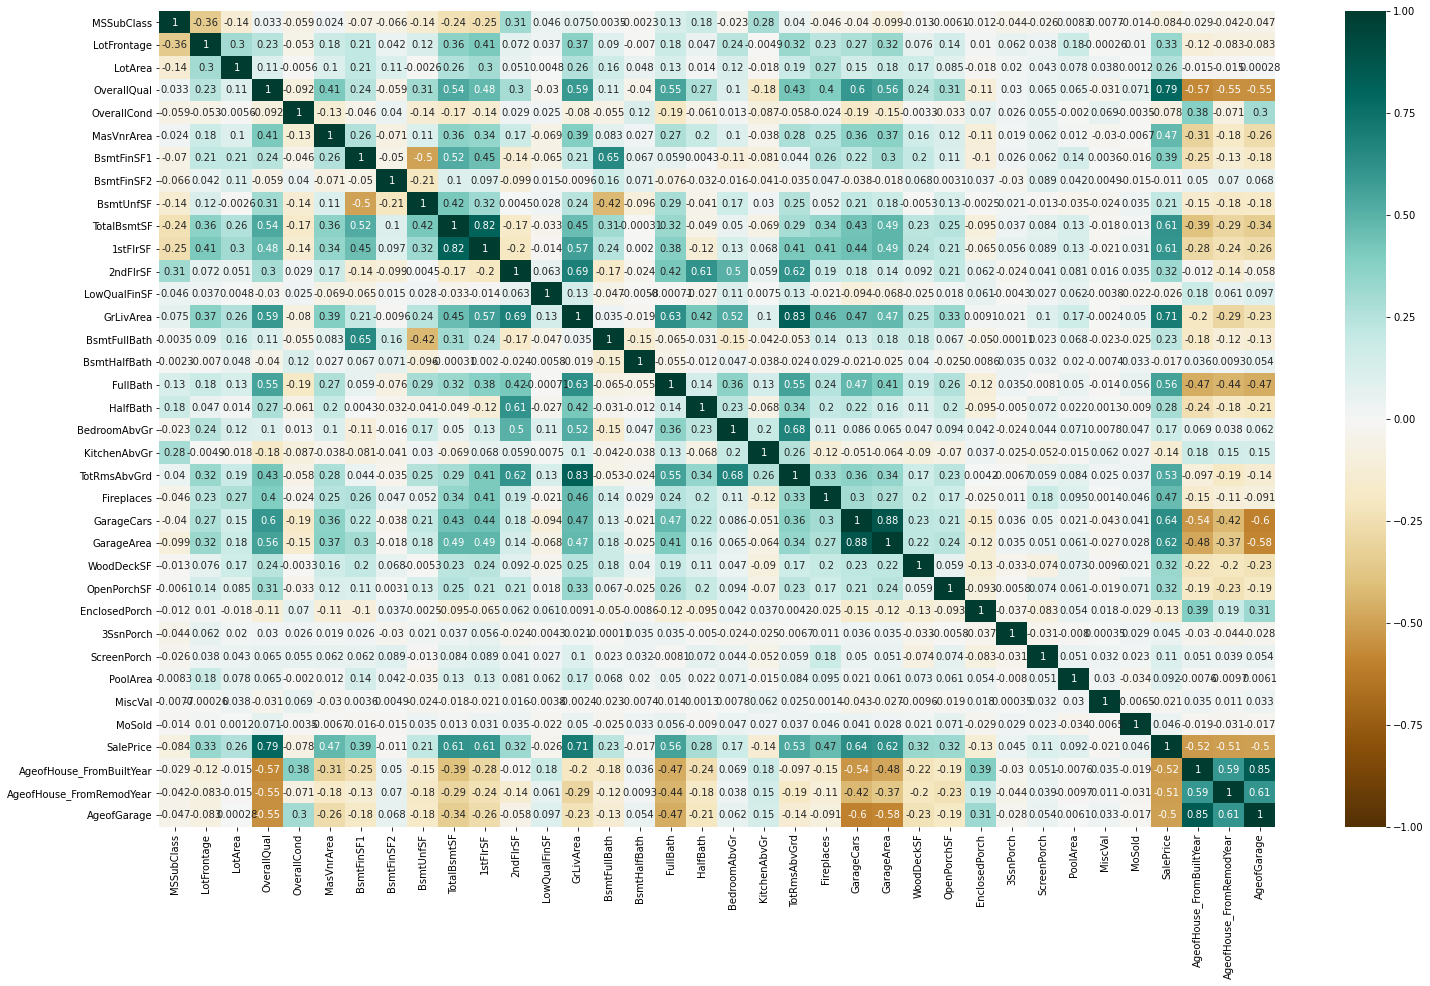

In [327]:
plt.figure(figsize = (25,15))

sns.heatmap(data_clean[num_vars].corr(),annot=True,vmin=-1, vmax=1, cmap='BrBG')

<AxesSubplot:>

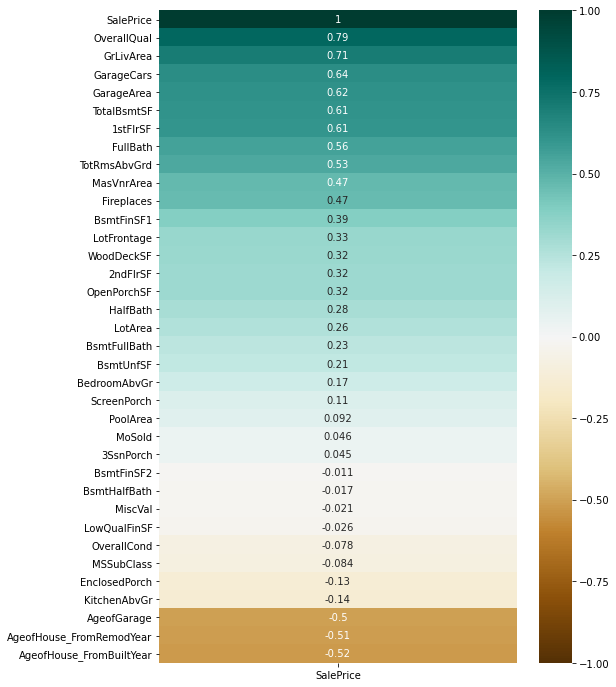

In [328]:
plt.figure(figsize=(8, 12))

sns.heatmap(data_clean[num_vars].corr()[['SalePrice']].sort_values(by='SalePrice', ascending=False),annot=True,vmin=-1, vmax=1, cmap='BrBG')

The top 10 correlated features with sales price most probably will be important predictors

## EDA - Categorical Variables Analysis (Univariate - Countplots)

In [329]:
#Identifying Categorical Variables
cat_vars = data_clean.columns[~data_clean.columns.isin(num_vars)]

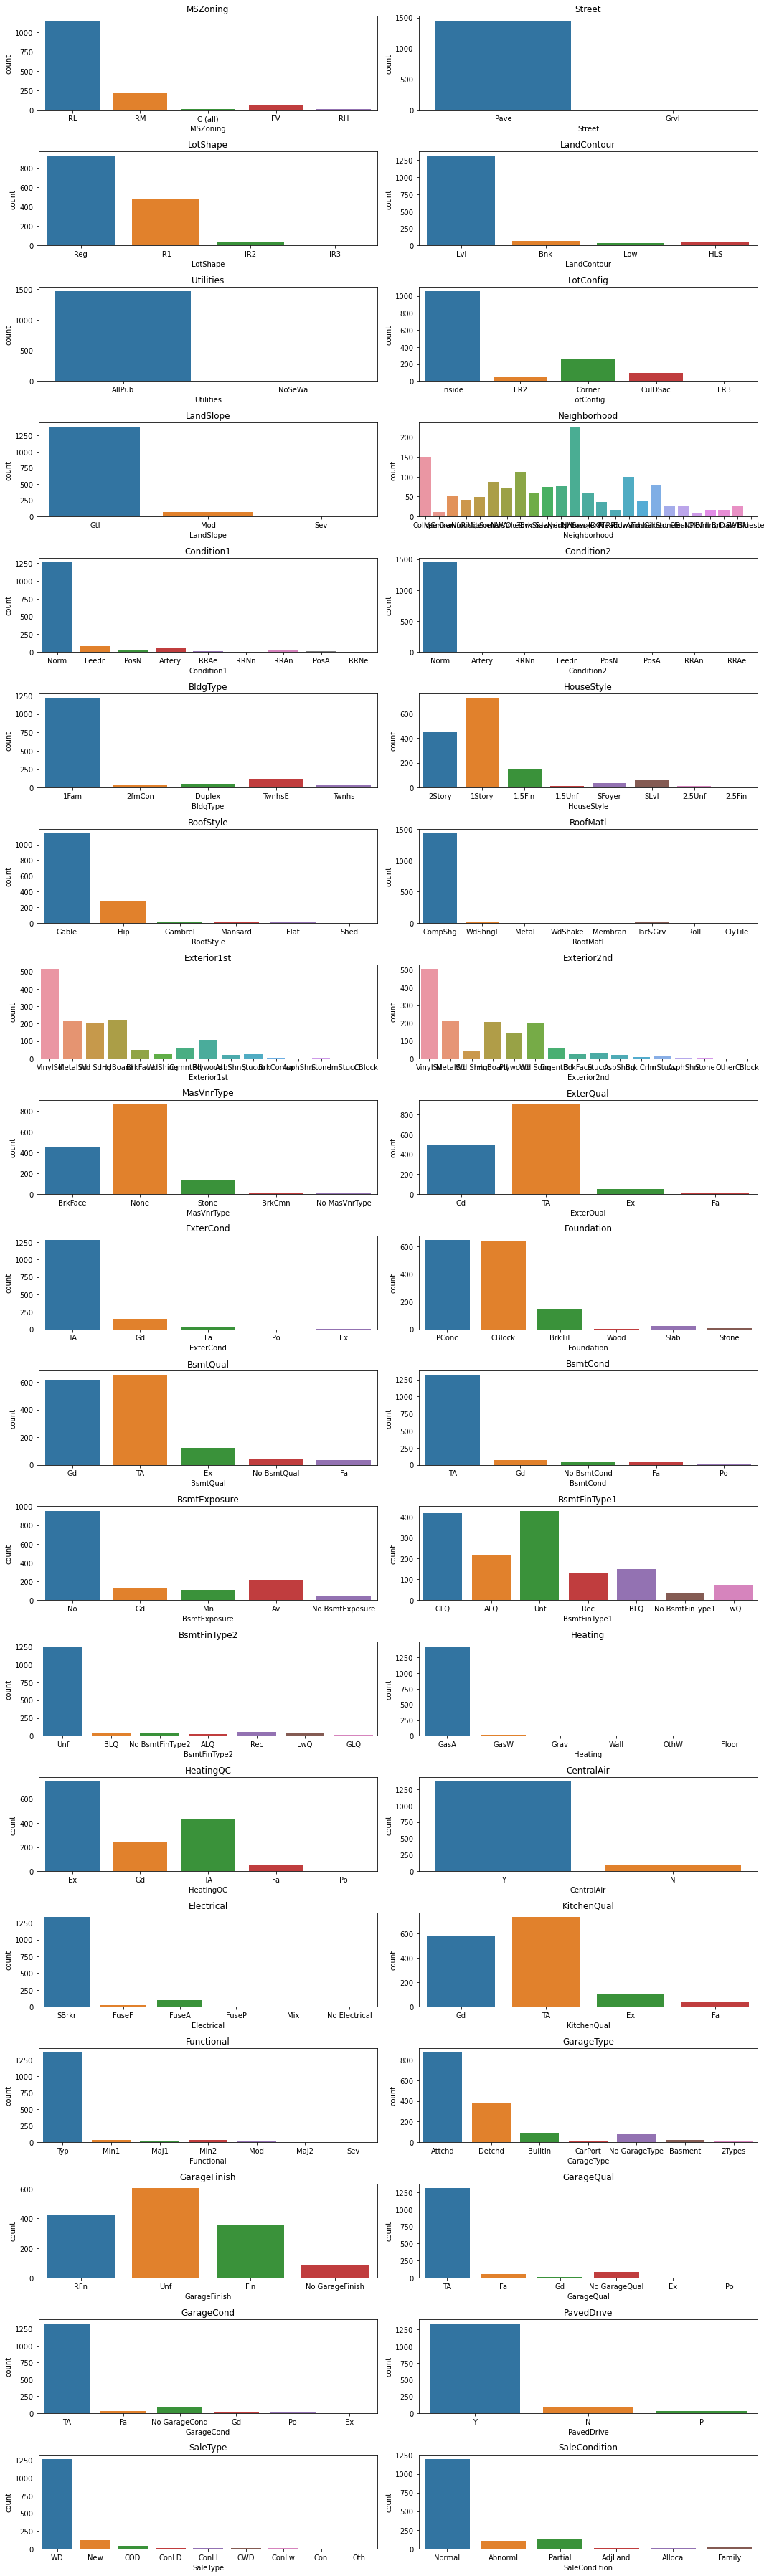

In [330]:
n_row=19
n_col=2
n_pos=1

fig = plt.figure(figsize=(50,40))
fig.set_size_inches(15, 50)

for i in cat_vars:
    plt.subplot(n_row,n_col,n_pos)
    sns.countplot(data_clean[i])
    plt.title(i)
    n_pos = n_pos+1
    plt.tight_layout()

## EDA - Categorical Variables Analysis (Bivariate - Boxplots)

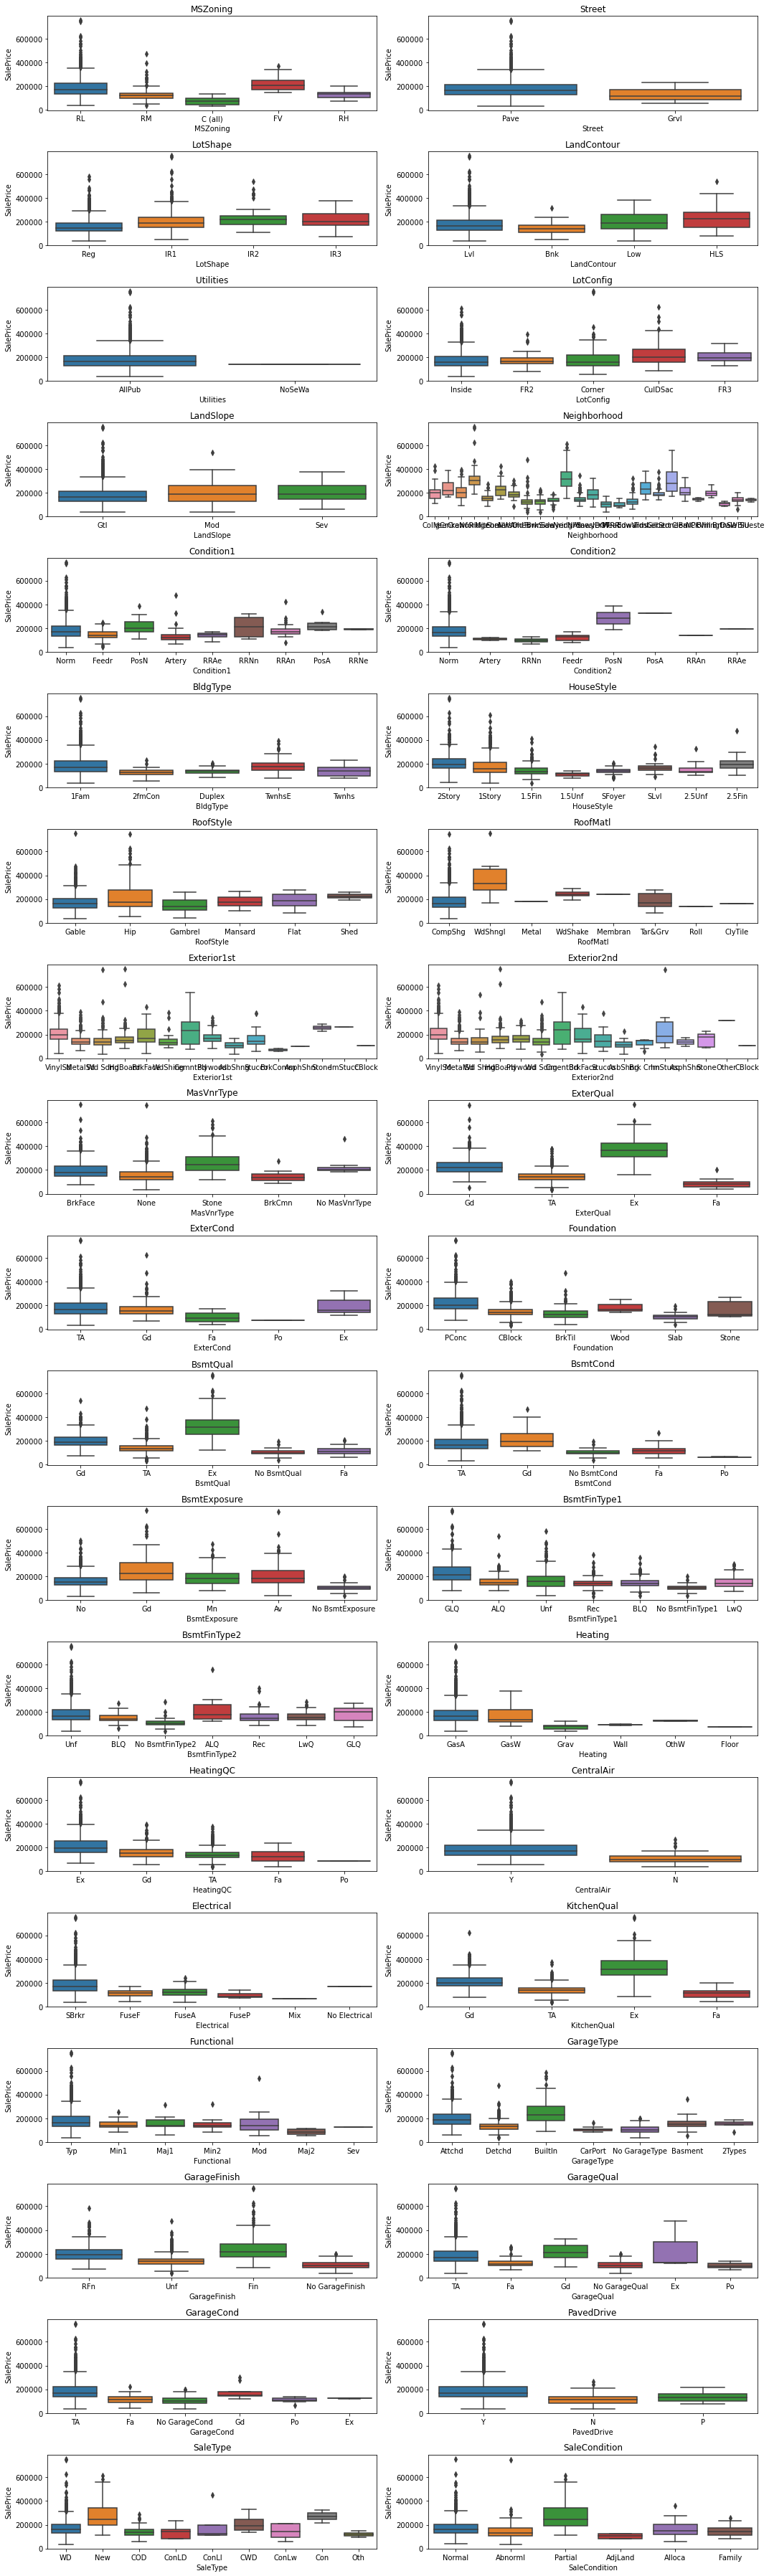

In [331]:
n_row=19
n_col=2
n_pos=1

fig = plt.figure(figsize=(50,40))
fig.set_size_inches(15, 50)

for i in cat_vars:
    plt.subplot(n_row,n_col,n_pos)
    sns.boxplot(x = data_clean[i],y = data_clean['SalePrice'])
    plt.title(i)
    n_pos = n_pos+1
    plt.tight_layout()

## Model Preprocessing

### Creating Dummy Columns

In [332]:
df_model = pd.get_dummies(data_clean,columns = cat_vars,drop_first = True)

### Train-Test Split

In [333]:
df_train,df_test= train_test_split(df_model, train_size=0.70, test_size=0.30,random_state = 100)
print(df_train.shape)
print(df_test.shape)

(1021, 243)
(438, 243)


### Min-Max Scaling

In [334]:
scaler = MinMaxScaler()
df_train[df_train.columns] = scaler.fit_transform(df_train[df_train.columns])
df_test[df_test.columns] = scaler.transform(df_test[df_test.columns])

### X and y split for Train and Test sets

In [335]:
X_train = df_train.drop(columns = ['SalePrice'])
y_train = np.array(df_train['SalePrice']).reshape(-1,1)

In [336]:
X_test = df_test.drop(columns = ['SalePrice'])
y_test = df_test['SalePrice']

## Model Building and Evaluation

### 1. Linear Regression  (Without RFE)

### Model Building and Evaluation

In [337]:
lm = LinearRegression()

lm.fit(X_train,y_train)

y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)

r2_train_ln = r2_score(y_train,y_train_pred)
res = y_train - y_train_pred
rss_ln = np.sum(np.square(res))
mse_ln = mean_squared_error(y_train,y_train_pred)
rmse_ln = mse_ln**0.5

print("Training Model R2: ",r2_train_ln)
print("RSS: ",rss_ln)
print("Mean Squared Error: ",mse_ln)
print("Root Mean Squared Error: ",rmse_ln)

Training Model R2:  0.9490816804169739
RSS:  0.626551371473376
Mean Squared Error:  0.0006136644186810735
Root Mean Squared Error:  0.024772250981311195


### Assumptions Testing

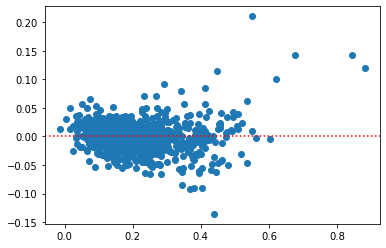

In [338]:
res_train = y_train - y_train_pred
plt.scatter(y_train_pred,res_train)
plt.axhline(y=0,c='r',ls = ':')

The above scatter plot shows the linear regression assumption of homoscedasticity is mostly followed

<AxesSubplot:ylabel='Count'>

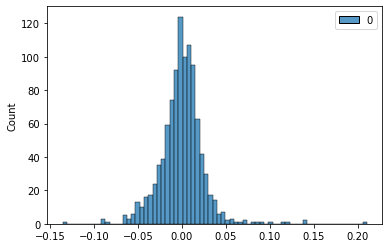

In [339]:
sns.histplot(res_train)

The residuals also are normally distributed cenntered around zero

### Prediction

In [340]:
r2_test_ln = r2_score(y_test,y_test_pred)
print("Test Model R2: ",r2_test_ln)

Test Model R2:  -2.68907475350503e+21


### Storing Evaluation Metrics in a LIST

In [341]:
LR = []
LR = [r2_train_ln,r2_test_ln,rss_ln,mse_ln,rmse_ln]

The R2 from general Linear Regression by including all variables leads to a a negative R2. Lets try to use RFE to do feature selection

### 2. Linear Regression (With RFE)

### Model Building (Identifying the Optimum N_Features_to_select)

In [342]:
Features_Selected = []
Train_R2= []
Test_R2= []
for i in range(1,100):

    
    lm = LinearRegression()

    rfe = RFE(lm,n_features_to_select=i)
    rfe.fit(X_train,y_train)

    y_train_pred = rfe.predict(X_train)
    y_test_pred = rfe.predict(X_test)
    Features_Selected.append(i)
    Train_R2.append(r2_score(y_train,y_train_pred))                  
    Test_R2.append(r2_score(y_test,y_test_pred))

d = {'Features_Selected': Features_Selected, 'Train_R2': Train_R2, 'Test_R2': Test_R2}    
lm_rfe_table = pd.DataFrame(d)
lm_rfe_table[lm_rfe_table['Test_R2'] == np.max(lm_rfe_table['Test_R2'])]

,Features_Selected,Train_R2,Test_R2
55,56,0.907513,0.796727


For 56 features in the dataset, RFE gives the best Test R2. We can see the same in the plot below

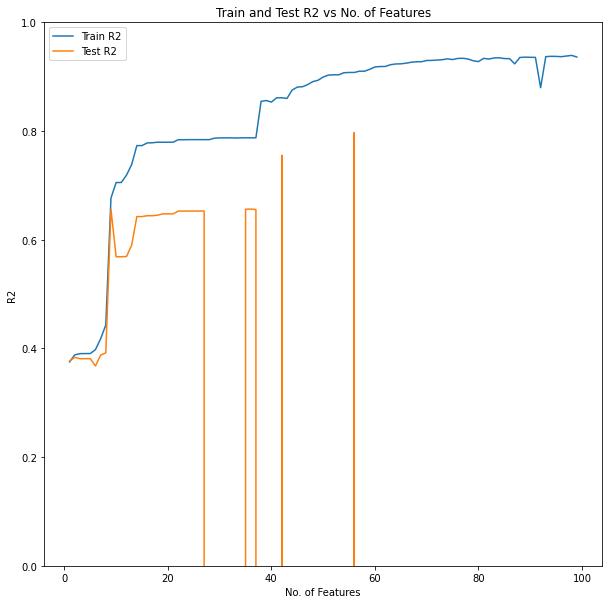

In [343]:
plt.figure(figsize = (10,10))
ax = plt.gca()
ax.set_ylim([0, 1])

plt.plot(lm_rfe_table['Features_Selected'] ,lm_rfe_table['Train_R2'])
plt.plot(lm_rfe_table['Features_Selected'] ,lm_rfe_table['Test_R2'])
plt.xlabel('No. of Features')
plt.ylabel('R2')
plt.title('Train and Test R2 vs No. of Features')
plt.legend(['Train R2','Test R2'])

### Model Evaluation and Prediction

In [344]:
lm = LinearRegression()

rfe = RFE(lm,n_features_to_select=56)
rfe.fit(X_train,y_train)

y_train_pred = rfe.predict(X_train)
y_test_pred = rfe.predict(X_test)


r2_train_ln_RFE = r2_score(y_train,y_train_pred)
res_RFE = y_train - y_train_pred
rss_ln_RFE = np.sum(np.square(res_RFE))
mse_ln_RFE = mean_squared_error(y_train,y_train_pred)
rmse_ln_RFE = mse_ln**0.5
r2_test_ln_RFE = r2_score(y_test,y_test_pred)


print("Training Model R2: ",r2_train_ln_RFE)
print("Test Model R2: ",r2_test_ln_RFE)
print("RSS: ",rss_ln_RFE)
print("Mean Squared Error: ",rss_ln_RFE)
print("Root Mean Squared Error: ",rmse_ln_RFE)

Training Model R2:  0.907512830555214
Test Model R2:  0.796726520078112
RSS:  1.1380572519647418
Mean Squared Error:  1.1380572519647418
Root Mean Squared Error:  0.024772250981311195


Even though Training Model RFE is 90%, Test set is only 79%. This is the case of overfitting. Lets try to penalize overfitting
by using regularization techniques - Ridge and Lasso 

### Significant Variables from RFE

In [345]:
rfe.get_params

<bound method BaseEstimator.get_params of RFE(estimator=LinearRegression(), n_features_to_select=56)>

### Metrics List (RFE)

In [346]:
LR_RFE = []
LR_RFE = [r2_train_ln_RFE,r2_test_ln_RFE,rss_ln_RFE,mse_ln_RFE,rmse_ln_RFE]

### 3. Ridge Regression

### Model Building (Finding best alpha)

In [347]:
lm_ridge=Ridge()
parameters= {'alpha':[x for x in [0.0005,0.001,0.01,0.1,0.2,0.4,0.5,0.7,0.8,0.9] + list(np.linspace(1,50,500))]}

In [348]:
lm_ridge_grid = GridSearchCV(estimator =lm_ridge,param_grid= parameters,scoring= 'neg_mean_absolute_error',)

lm_ridge_grid.fit(X_train,y_train)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [0.0005, 0.001, 0.01, 0.1, 0.2, 0.4, 0.5, 0.7,
                                   0.8, 0.9, 1.0, 1.0981963927855711,
                                   1.1963927855711423, 1.2945891783567134,
                                   1.3927855711422845, 1.4909819639278556,
                                   1.5891783567134268, 1.6873747494989981,
                                   1.785571142284569, 1.8837675350701404,
                                   1.9819639278557113, 2.0801603206412826,
                                   2.1783567134268536, 2.276553106212425,
                                   2.3747494989979963, 2.472945891783567,
                                   2.571142284569138, 2.6693386773547094,
                                   2.7675350701402808, 2.8657314629258517, ...]},
             scoring='neg_mean_absolute_error')

In [349]:
lm_ridge_best_gcv = lm_ridge_grid.best_estimator_
lm_ridge_best_gcv

Ridge(alpha=6.597194388777555)

In [350]:
lm_ridge_best_gcv.fit(X_train,y_train)

Ridge(alpha=6.597194388777555)

### Training Set Evaluation

In [351]:
y_pred_train_ridge_gcv = lm_ridge_best_gcv.predict(X_train)

r2_train_Ridge = r2_score(y_train,y_pred_train_ridge_gcv)
res_Ridge = y_train - y_pred_train_ridge_gcv
rss_Ridge = np.sum(np.square(res_Ridge))
mse_Ridge = mean_squared_error(y_train,y_pred_train_ridge_gcv)
rmse_Ridge = mse_Ridge**0.5

print("Best Estimator Alpha: ",lm_ridge_grid.best_estimator_)
print("Training Model R2: ",r2_train_Ridge)
print("RSS: ",rss_Ridge)
print("Mean Squared Error: ",mse_Ridge)
print("Root Mean Squared Error: ",rmse_Ridge)



Best Estimator Alpha:  Ridge(alpha=6.597194388777555)
Training Model R2:  0.8895536762086629
RSS:  1.3590451572703357
Mean Squared Error:  0.0013310922206369595
Root Mean Squared Error:  0.03648413656148326


### Test Set Prediction

In [352]:
y_pred_test_ridge_gcv =  lm_ridge_best_gcv.predict(X_test)
r2_test_Ridge = r2_score(y_test,y_pred_test_ridge_gcv)

print("Training Model R2: ",r2_score(y_train,y_pred_train_ridge_gcv))
print("Test Model R2: ",r2_score(y_test,y_pred_test_ridge_gcv))


Training Model R2:  0.8895536762086629
Test Model R2:  0.8668211159838455


### Top 10 Predictors from Model

In [353]:
d = {'Coeff':lm_ridge_best_gcv.coef_.T.reshape(-1,),'Predictor':X_train.columns}
ridge_coeff = pd.DataFrame(d)
ridge_coeff.sort_values(by='Coeff',ascending = False).head(10)

,Coeff,Predictor
3,0.079175,OverallQual
11,0.070194,2ndFlrSF
13,0.069195,GrLivArea
67,0.062575,Neighborhood_NoRidge
114,0.052042,RoofMatl_WdShngl
10,0.050353,1stFlrSF
22,0.042256,GarageCars
16,0.041156,FullBath
20,0.041071,TotRmsAbvGrd
68,0.034737,Neighborhood_NridgHt


### Metrics List (Ridge)

In [354]:
Ridge_metrics = []
Ridge_metrics = [r2_train_Ridge,r2_test_Ridge,rss_Ridge,mse_Ridge,rmse_Ridge]

### 4. Lasso Regression

### Model Building and Finding Best alpha

In [355]:
lm_lasso = Lasso()
parameters= {'alpha':[x for x in [0.0001,0.0002,0.0003,0.0004,0.0005,0.001,0.01,0.1,0.2,0.4,0.5,0.7,0.8,0.91]]}

In [356]:
lm_lasso_grid = GridSearchCV(estimator =lm_lasso,param_grid= parameters)

lm_lasso_grid.fit(X_train,y_train)

lm_lasso_best_gcv = lm_lasso_grid.best_estimator_
lm_lasso_best_gcv

Lasso(alpha=0.0003)

In [357]:
y_pred_train_lasso_gcv = lm_lasso_best_gcv.predict(X_train)


r2_train_Lasso = r2_score(y_train,y_pred_train_lasso_gcv)
res_Lasso = y_train - y_pred_train_lasso_gcv
rss_Lasso = np.sum(np.square(res_Lasso))
mse_Lasso = mean_squared_error(y_train,y_pred_train_lasso_gcv)
rmse_Lasso = mse_Lasso**0.5

print("Best Estimator Alpha: ",lm_lasso_grid.best_estimator_)
print("Training Model R2: ",r2_train_Lasso)
print("RSS: ",rss_Lasso)
print("Mean Squared Error: ",mse_Lasso)
print("Root Mean Squared Error: ",rmse_Lasso)


Best Estimator Alpha:  Lasso(alpha=0.0003)
Training Model R2:  0.8776532015505821
RSS:  22686.120819923806
Mean Squared Error:  0.0014745160005826441
Root Mean Squared Error:  0.038399427086646024


### Test Set Prediction

In [358]:
y_pred_test_lasso_gcv =  lm_lasso_best_gcv.predict(X_test)
r2_test_Lasso = r2_score(y_test,y_pred_test_lasso_gcv)

print("Training Model R2: ",r2_score(y_train,y_pred_train_lasso_gcv))
print("Test Model R2: ",r2_score(y_test,y_pred_test_lasso_gcv))

Training Model R2:  0.8776532015505821
Test Model R2:  0.8575889627671119


### Top 10 Predictors

In [359]:
d = {'Coeff':lm_lasso_best_gcv.coef_,'Predictor':X_train.columns}
Lasso_coeff_best = pd.DataFrame(d)
Lasso_coeff_best.sort_values(by='Coeff',ascending = False).head(10)

,Coeff,Predictor
13,0.286317,GrLivArea
3,0.144515,OverallQual
67,0.070563,Neighborhood_NoRidge
22,0.057190,GarageCars
114,0.055521,RoofMatl_WdShngl
68,0.041844,Neighborhood_NridgHt
168,0.032077,BsmtExposure_Gd
14,0.027468,BsmtFullBath
58,0.026705,Neighborhood_Crawfor
73,0.026426,Neighborhood_Somerst


### Metrics List (Lasso)

In [360]:
Lasso_metrics = []
Lasso_metrics = [r2_train_Lasso,r2_test_Lasso,rss_Lasso,mse_Lasso,rmse_Lasso]

## Comparison of metrics between Normal Linear Regression, Linear Regression (RFE), Lasso and Ridge

In [361]:

d = {'Metrics': ['Train R2','Test R2', 'RSS','MSE','RMSE'], 'Linear Regression': LR,'Linear Regression (RFE)': LR_RFE,
    'Ridge': Ridge_metrics, 'Lasso': Lasso_metrics}

Metrics = pd.DataFrame(d)

In [362]:
Metrics

,Metrics,Linear Regression,Linear Regression (RFE),Ridge,Lasso
0,Train R2,9.490817e-01,0.907513,0.889554,0.877653
1,Test R2,-2.689075e+21,0.796727,0.866821,0.857589
2,RSS,6.265514e-01,1.138057,1.359045,22686.120820
3,MSE,6.136644e-04,0.001115,0.001331,0.001475
4,RMSE,2.477225e-02,0.024772,0.036484,0.038399


 From above table, we can conclude that **Ridge is a slightly better model than other models since Training R2 is ~89% and Test R2 is ~87%**. Lasso,close second to Ridge, on the other hand, though has only 2% variance between Train and Test performance, has lower R2 on train and test sets(compared to Ridge)

## Subjective Questions

**Question 1**

What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

**Ridge Regression**

Trying alpha value as double of what came as optimum in the model

In [363]:
Ridge_double_alpha = lm_ridge_best_gcv.alpha*2
print("The new alpha is: ",Ridge_double_alpha)

The new alpha is:  13.19438877755511


In [364]:
lm_ridge=Ridge(alpha=Ridge_double_alpha)
lm_ridge.fit(X_train,y_train)

y_pred_train_ridge_gcv = lm_ridge.predict(X_train)

r2_train_Ridge = r2_score(y_train,y_pred_train_ridge_gcv)
res_Ridge = y_train - y_pred_train_ridge_gcv
rss_Ridge = np.sum(np.square(res_Ridge))
mse_Ridge = mean_squared_error(y_train,y_pred_train_ridge_gcv)
rmse_Ridge = mse_Ridge**0.5

print("Alpha: ",Ridge_double_alpha)
print("RSS: ",rss_Ridge)
print("Mean Squared Error: ",mse_Ridge)
print("Root Mean Squared Error: ",rmse_Ridge)

y_pred_test_ridge_gcv =  lm_ridge.predict(X_test)
r2_test_Ridge = r2_score(y_test,y_pred_test_ridge_gcv)

print("Training Model R2: ",r2_score(y_train,y_pred_train_ridge_gcv))
print("Test Model R2: ",r2_score(y_test,y_pred_test_ridge_gcv))



Alpha:  13.19438877755511
RSS:  1.5275481165979046
Mean Squared Error:  0.0014961293992144021
Root Mean Squared Error:  0.038679831943978275
Training Model R2:  0.8758598469005399
Test Model R2:  0.8590141904277395


In [375]:
d = {'Coeff':lm_ridge.coef_.T.reshape(-1,),'Predictor':X_train.columns}
ridge_coeff = pd.DataFrame(d)
ridge_coeff.sort_values(by='Coeff',ascending = False).head(10)

,Coeff,Predictor
3,0.065561,OverallQual
67,0.056093,Neighborhood_NoRidge
13,0.054103,GrLivArea
11,0.053228,2ndFlrSF
10,0.040046,1stFlrSF
20,0.040046,TotRmsAbvGrd
16,0.038512,FullBath
22,0.037187,GarageCars
114,0.033338,RoofMatl_WdShngl
21,0.031989,Fireplaces


**Lasso Regression**

Trying alpha value as double of what came as optimum in the model

In [366]:
Lasso_double_alpha = lm_lasso_best_gcv.alpha*2
print("The new alpha is: ",Lasso_double_alpha)

The new alpha is:  0.0006


In [367]:
lm_Lasso=Lasso(alpha=Lasso_double_alpha)
lm_Lasso.fit(X_train,y_train)

y_pred_train_Lasso_gcv = lm_Lasso.predict(X_train)

r2_train_Lasso = r2_score(y_train,y_pred_train_Lasso_gcv)
res_Lasso = y_train - y_pred_train_Lasso_gcv
rss_Lasso = np.sum(np.square(res_Lasso))
mse_Lasso = mean_squared_error(y_train,y_pred_train_Lasso_gcv)
rmse_Lasso = mse_Ridge**0.5

print("Alpha: ",Lasso_double_alpha)
print("RSS: ",rss_Lasso)
print("Mean Squared Error: ",mse_Lasso)
print("Root Mean Squared Error: ",rmse_Lasso)

y_pred_test_lasso_gcv =  lm_Lasso.predict(X_test)
r2_test_Lasso = r2_score(y_test,y_pred_test_lasso_gcv)

print("Training Model R2: ",r2_score(y_train,y_pred_train_Lasso_gcv))
print("Test Model R2: ",r2_score(y_test,y_pred_test_lasso_gcv))



Alpha:  0.0006
RSS:  21946.28164651997
Mean Squared Error:  0.0018077996616653884
Root Mean Squared Error:  0.038679831943978275
Training Model R2:  0.8499992534802578
Test Model R2:  0.8324978427219455


In [368]:
d = {'Coeff':lm_Lasso.coef_,'Predictor':X_train.columns}
Lasso_coeff = pd.DataFrame(d)
Lasso_coeff.sort_values(by='Coeff',ascending = False).head(10)

,Coeff,Predictor
13,0.262834,GrLivArea
3,0.167656,OverallQual
67,0.065806,Neighborhood_NoRidge
22,0.060972,GarageCars
68,0.038028,Neighborhood_NridgHt
168,0.032135,BsmtExposure_Gd
21,0.029072,Fireplaces
14,0.017577,BsmtFullBath
58,0.016351,Neighborhood_Crawfor
73,0.013903,Neighborhood_Somerst


**Question 3**

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

Lets Look at top 5 predictor variables from our original best Lasso Model

In [369]:
Lasso_coeff_best.sort_values(by='Coeff',ascending = False).head(5)

,Coeff,Predictor
13,0.286317,GrLivArea
3,0.144515,OverallQual
67,0.070563,Neighborhood_NoRidge
22,0.057190,GarageCars
114,0.055521,RoofMatl_WdShngl


Lets remove the top 5 predictors and rebuild the model

In [370]:
Lasso_columns_to_remove = list(Lasso_coeff_best.sort_values(by='Coeff',ascending = False).head(5)['Predictor'])

In [371]:
X_Train_Lasso_new = X_train.drop(Lasso_columns_to_remove,axis=1)
X_Test_Lasso_new = X_test.drop(Lasso_columns_to_remove,axis=1)

In [372]:
lm_Lasso=Lasso(alpha=lm_lasso_best_gcv.alpha)
lm_Lasso.fit(X_Train_Lasso_new,y_train)

y_pred_train_Lasso_gcv = lm_Lasso.predict(X_Train_Lasso_new)

r2_train_Lasso = r2_score(y_train,y_pred_train_Lasso_gcv)
res_Lasso = y_train - y_pred_train_Lasso_gcv
rss_Lasso = np.sum(np.square(res_Lasso))
mse_Lasso = mean_squared_error(y_train,y_pred_train_Lasso_gcv)
rmse_Lasso = mse_Ridge**0.5

print("Alpha: ",Lasso_double_alpha)
print("RSS: ",rss_Lasso)
print("Mean Squared Error: ",mse_Lasso)
print("Root Mean Squared Error: ",rmse_Lasso)

y_pred_test_lasso_gcv =  lm_Lasso.predict(X_Test_Lasso_new)
r2_test_Lasso = r2_score(y_test,y_pred_test_lasso_gcv)

print("Training Model R2: ",r2_score(y_train,y_pred_train_Lasso_gcv))
print("Test Model R2: ",r2_score(y_test,y_pred_test_lasso_gcv))

Alpha:  0.0006
RSS:  22358.469049056064
Mean Squared Error:  0.001698529893910579
Root Mean Squared Error:  0.038679831943978275
Training Model R2:  0.8590658260008882
Test Model R2:  0.8436517632530558


In [373]:
d = {'Coeff':lm_Lasso.coef_,'Predictor':X_Train_Lasso_new.columns}
Lasso_coeff = pd.DataFrame(d)
Lasso_coeff.sort_values(by='Coeff',ascending = False).head(5)

,Coeff,Predictor
9,0.280044,1stFlrSF
10,0.176783,2ndFlrSF
20,0.064607,GarageArea
4,0.041489,MasVnrArea
163,0.037043,BsmtExposure_Gd
